In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df_clip = pd.read_csv('data/csv/accuracy_clip.csv', index_col=0)
df_clip_all = pd.read_csv('data/csv/accuracy_clip_all.csv', index_col=0)
df_baseline = pd.read_csv('data/csv/accuracy_baseline.csv', index_col=0)
df_baseline_all = pd.read_csv('data/csv/accuracy_baseline_all.csv', index_col=0)

In [24]:
df_clip = df_clip.rename(columns={'svm_test': 'CLIP Single SVM', 'ridge_test': 'CLIP Single Ridge'}).drop(columns=['svm_train', 'ridge_train'])
df_clip_all = df_clip_all.rename(columns={'svm_test': 'CLIP 10 SVM', 'ridge_test': 'CLIP 10 Ridge'}).drop(columns=['svm_train', 'ridge_train'])
df_baseline = df_baseline.rename(columns={'svm_test': 'Baseline Single SVM', 'ridge_test': 'Baseline Single Ridge'}).drop(columns=['svm_train', 'ridge_train'])
df_baseline_all = df_baseline_all.rename(columns={'svm_test': 'Baseline 10 SVM', 'ridge_test': 'Baseline 10 Ridge'}).drop(columns=['svm_train', 'ridge_train'])

In [25]:
df_clip['eval'] = 0
df_clip_all['eval'] = 1
df_baseline['eval'] = 2
df_baseline_all['eval'] = 3

In [26]:
df_melt = df_baseline_all.melt(id_vars=['eval'])
df_melt = pd.concat([df_melt, df_baseline.melt(id_vars=['eval'])], ignore_index=True, sort=False)
df_melt = pd.concat([df_melt, df_clip_all.melt(id_vars=['eval'])], ignore_index=True, sort=False)
df_melt = pd.concat([df_melt, df_clip.melt(id_vars=['eval'])], ignore_index=True, sort=False)

In [27]:
df_melt = df_melt.rename(columns={'variable': 'Model', 'value': 'Accuracy'})
df_melt

,eval,Model,Accuracy
0,3,Baseline 10 SVM,0.383333
1,3,Baseline 10 SVM,0.266667
2,3,Baseline 10 SVM,0.266667
3,3,Baseline 10 SVM,0.389831
4,3,Baseline 10 SVM,0.433333
...,...,...,...
163,0,CLIP Single Ridge,1.000000
164,0,CLIP Single Ridge,1.000000
165,0,CLIP Single Ridge,0.833333
166,0,CLIP Single Ridge,0.833333


In [28]:
df_melt.Accuracy = df_melt.Accuracy*100

In [29]:
df_melt[df_melt['Model'] == 'CLIP 10 Ridge'].Accuracy.mean()

76.07576070509411

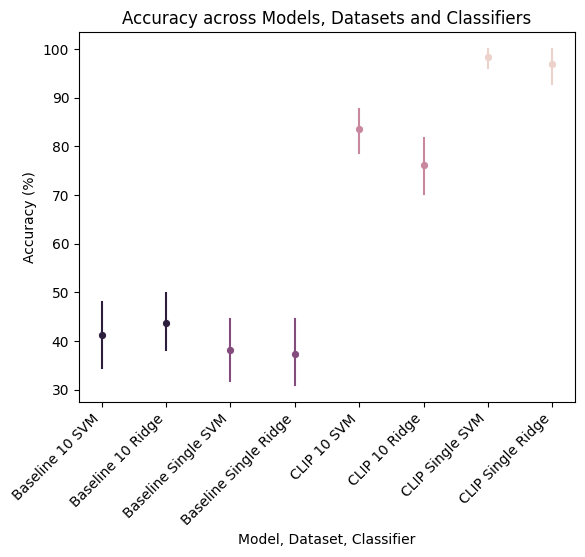

In [30]:
sns.lineplot(x='Model', y='Accuracy', data=df_melt, marker='o', linestyle='', err_style='bars', hue='eval', legend=False)
plt.ylabel('Accuracy (%)')
plt.xlabel('Model, Dataset, Classifier')
plt.xticks(rotation=45, ha='right')
_ = plt.title('Accuracy across Models, Datasets and Classifiers')